In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

# Loading Data

In [2]:
data = pd.read_csv('AHDBase_TrainingSet.csv')
data_cols = list(data.columns)
data_cols.remove('Unnamed: 0')
train_data = data[data_cols]

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.890196,0.000000,0.000000,0.223529,0.776471,1.000000,1.00000,1.0,0.890196,0.000000,...,1.000000,0.443137,0.000000,0.000000,0.223529,0.776471,1.000000,1.000000,1.000000,0
1,0.644330,0.324742,0.175258,0.159794,0.159794,0.335052,1.00000,1.0,0.355670,0.927835,...,0.067010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.355670,6
2,1.000000,1.000000,0.800000,0.349020,0.203922,0.203922,0.85098,1.0,1.000000,0.741176,...,0.223529,1.000000,0.909804,0.478431,0.235294,0.082353,0.101961,0.274510,0.866667,5
3,1.000000,1.000000,0.976471,0.141176,0.321569,1.000000,1.00000,1.0,1.000000,1.000000,...,0.564706,0.180392,0.360784,1.000000,1.000000,1.000000,1.000000,0.788235,0.090196,8
4,0.000000,0.849765,1.000000,1.000000,0.938967,0.985915,1.00000,1.0,0.450704,0.253521,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.633803,0.652582,3


In [4]:
data = pd.read_csv('AHDBase_TestingSet.csv')
data_cols = list(data.columns)
data_cols.remove('Unnamed: 0')
test_data = data[data_cols]

In [5]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,1.000000,0.396078,0.000000,0.164706,0.694118,1.000000,1.000000,1.000000,0.639216,0.015686,...,1.000000,1.000000,0.847059,0.411765,0.000000,0.450980,0.666667,1.000000,1.000000,0
1,1.000000,1.000000,1.000000,0.243137,0.000000,0.000000,0.192157,0.756863,1.000000,1.000000,...,1.000000,0.549020,0.176471,0.321569,0.517647,0.839216,1.000000,1.000000,1.000000,1
2,0.800000,0.549020,0.298039,1.000000,1.000000,1.000000,1.000000,1.000000,0.101961,0.349020,...,1.000000,1.000000,1.000000,0.501961,0.050980,0.298039,0.501961,0.549020,0.650980,4
3,0.189427,0.788546,0.960352,0.951542,1.000000,1.000000,0.898678,0.674009,0.942731,0.264317,...,0.682819,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.951542,0.330396,3
4,1.000000,1.000000,0.956863,0.600000,0.223529,0.109804,0.149020,0.909804,1.000000,0.980392,...,0.847059,0.976471,0.576471,0.200000,0.000000,0.062745,0.317647,0.784314,1.000000,5


The label is: 2.0


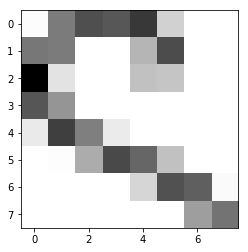

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

output = 'label'
features = list(train_data.columns)
features.remove(output)

image_with_label = train_data.iloc[65]

label = image_with_label[output]
image = image_with_label[features].values

image = image.reshape(8, 8)

print('The label is:', label)
plt.imshow(image[0:64], cmap='gray')

In [7]:
print(len(train_data))
print(len(test_data))

60000
10000


In [8]:
binarizer = LabelBinarizer()
one_hot_encoded_train_labels = binarizer.fit_transform(train_data[output])

test_value = 3
print(train_data[output][test_value])
print(one_hot_encoded_train_labels[test_value])


8
[0 0 0 0 0 0 0 0 1 0]


In [9]:
X_train = train_data[features].values
y_train = one_hot_encoded_train_labels

X_test = test_data[features].values
y_test = binarizer.transform(test_data[output])

In [10]:
# Take transpose since the neural network considers columns as examples and rows as features
# i.e. if m is the number of samples (images) and n is the number of features (image pixels), then 
# n x m is the shape that is accepted by the network
X_train = X_train.T
y_train = y_train.T

In [11]:
print(X_train.shape)
print(y_train.shape)

(64, 60000)
(10, 60000)


# Helper Functions

In [12]:
def sigmoid(Z):
    return 1. / (1 + np.exp(-Z))

def sigmoid_prime(A):
    return A * (1 - A)

In [13]:
def get_mini_batches(X, y, batch_size):
    assert X.shape[1] == y.shape[1], 'Size Mismatch'
    m = X.shape[1]
    num_of_mini_batches = m // batch_size

    for i in range(num_of_mini_batches):
        start = i * batch_size
        end = start + batch_size
        mini_bacth_X = X[:, start:end]
        mini_batch_y = y[:, start:end]
        yield mini_bacth_X, mini_batch_y

    if m % batch_size != 0:
        last_mini_bacth_X = X[:, end:]
        last_mini_bacth_y = y[:, end:]
        yield last_mini_bacth_X, last_mini_bacth_y

In [14]:

def initialize_weights(layers):
    parameters = {}
    L = parameters['num_of_layers'] = len(layers) - 1 # since the input layer is include the input layer
    
    for i in range(L):
        W = 2*np.random.random((layers[i + 1], layers[i])) - 1
        W /= layers[i + 1]

        b = 2*np.random.random((layers[i + 1], 1)) - 1
        
        parameters[f'W{i + 1}'] = W
        parameters[f'b{i + 1}'] = b
    
    return parameters

In [15]:
def feedforward(X, parameters):
    cache = {}
    cache['A0'] = X
    
    for i in range(1, parameters['num_of_layers'] + 1):
        W = parameters[f'W{i}']
        b = parameters[f'b{i}']
        A_prev = cache[f'A{i - 1}']
        
        Z = W.dot(A_prev) + b
        A = sigmoid(Z)
        
        cache[f'A{i}'] = A
        
    y_pred = A
    
    return y_pred, cache

In [16]:
def backpropagation(y_true, y_pred, cache, parameters):
    L = parameters['num_of_layers']
    m = y_true.shape[1]
    errors = {}
    
    errors[f'delta{L}'] = -(y_true - y_pred) * sigmoid_prime(y_pred)
    
    for i in range(L, 1, -1):
        W = parameters[f'W{i}']
        delta = errors[f'delta{i}']
        A_prev = cache[f'A{i - 1}']
        
        delta_prev = W.T.dot(delta) * sigmoid_prime(A_prev)
        errors[f'delta{i - 1}'] = delta_prev
    
    
    gradients = {}
    for i in range(1, L + 1):
        delta = errors[f'delta{i}']
        A_prev = cache[f'A{i - 1}']
        
        dW = delta.dot(A_prev.T) / m
        
        gradients[f'dW{i}'] = dW
    
    for i in range(1, L + 1):
        delta = errors[f'delta{i}']
        db = delta.sum(axis=1, keepdims=True) / m
        gradients[f'db{i}'] = db

    return gradients

In [17]:
def update_parameters(parameters, gradients, alpha):
    L = parameters['num_of_layers']
    for i in range(1, L + 1):
        W = parameters[f'W{i}']
        b = parameters[f'b{i}']
        dW = gradients[f'dW{i}']
        db = gradients[f'db{i}']
        
        W = W - alpha*dW
        b = b - alpha*db
    
        parameters[f'W{i}'] = W
        parameters[f'b{i}'] = b
    
    return parameters

In [18]:
def compute_cost(y_true, y_pred):
    m = y_true.shape[1]
    return 0.5 * np.sum((y_true - y_pred) ** 2) / m

# Neural Network Implementation

# Mini-Batch Gradient Descent

In [19]:
def train(X, y, hidden_layers, alpha=0.9, batch_size=64, epochs=2000, parameters=None, verbose=100):
    
    layers = [X.shape[0]] + hidden_layers + [y.shape[0]]

    if parameters == None:
        parameters = initialize_weights(layers)
    costs = []
    for epoch in range(1, epochs + 1):

        ### Shuffling ###
        indices = np.arange(X.shape[1])
        np.random.shuffle(indices)
        X = X[:, indices]
        y = y[:, indices]
        #################
        total_cost = 0
        j = 0
        for mini_bacth_X, mini_bacth_y in get_mini_batches(X, y, batch_size):
            m = mini_bacth_X.shape[1]
            y_true = mini_bacth_y
            y_pred, cache = feedforward(mini_bacth_X, parameters)

            y_true = np.atleast_2d(y_true)
            cost = compute_cost(y_true, y_pred)
            total_cost += cost

            gradients = backpropagation(y_true, y_pred, cache, parameters)

            for i in range(1, parameters['num_of_layers'] + 1):
                assert parameters[f'W{i}'].shape == gradients[f'dW{i}'].shape, 'Size Mismatch'
                assert parameters[f'b{i}'].shape == gradients[f'db{i}'].shape, 'Size Mismatch'

            # update weights
            parameters = update_parameters(parameters=parameters, gradients=gradients, alpha=alpha)
            j += 1

        avg_cost = total_cost / j
        costs.append(avg_cost)
        
        if epoch % verbose == 0:
            print(epoch, avg_cost)
    
    return parameters, costs

In [20]:
tic = time.time()
parameters, costs = train(X_train, y_train, hidden_layers=[32, 16, 12, 10], alpha=0.1,
                          batch_size=128, parameters=None, epochs=50000, verbose=100)
toc = time.time()

100 0.4500115550441033
200 0.45001195632463403
300 0.450009673225429
400 0.45000949821572367
500 0.450012247493987
600 0.45000977516327023
700 0.45001063042990114
800 0.45001144713700064
900 0.4500101207751126
1000 0.45000975104612645
1100 0.45001187085164607
1200 0.45001070516065506
1300 0.45000895671264757
1400 0.4500111083565569
1500 0.45001103994992125
1600 0.4500105653064905
1700 0.4500100302240186
1800 0.45000974406785954
1900 0.45000814850404147
2000 0.45000950438850484
2100 0.45000958270267777
2200 0.45000982496836517
2300 0.4500089098453699
2400 0.4500107327518878
2500 0.45001005892700907
2600 0.4500105286773962
2700 0.4500092251052109
2800 0.45000975129098647
2900 0.450008551903441
3000 0.4500102552724172
3100 0.45001008372157986
3200 0.45000985280008643
3300 0.45000932000018207
3400 0.45000901521701714
3500 0.45001014293636465
3600 0.4500090744243674
3700 0.4500086088500114
3800 0.4500092928006922
3900 0.4500087917947109
4000 0.45000950389003264
4100 0.4500096772103474
4200 

31400 0.0077713712804894875
31500 0.007780326646765279
31600 0.007761903034105468
31700 0.007763252081157591
31800 0.007766995106447531
31900 0.007766023361404491
32000 0.007767704417612842
32100 0.007779429423503751
32200 0.007758223202119684
32300 0.007764838333260315
32400 0.007767247967793823
32500 0.007756913355616907
32600 0.007762528539821283
32700 0.0077683546773586
32800 0.007757234224686971
32900 0.007772440723824169
33000 0.007762154119686487
33100 0.007754785996844234
33200 0.0077390511353226926
33300 0.007748427337395485
33400 0.007735421470758236
33500 0.007732006368543265
33600 0.0077369689486525735
33700 0.0077309506381282225
33800 0.007734484420345876
33900 0.007727496888087827
34000 0.0077261342231466764
34100 0.007733031060055169
34200 0.007735998886851912
34300 0.007723849270054467
34400 0.00772379921860475
34500 0.007721925143226478
34600 0.007722282971376978
34700 0.007722202336251014
34800 0.007701579659308421
34900 0.007697905642569574
35000 0.007704498059457780

In [21]:
parameters.keys()

dict_keys(['num_of_layers', 'W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4', 'W5', 'b5'])

In [22]:
(toc - tic) / 60

361.04720673163735

In [23]:
A0 = X_test.T
A0.shape

(64, 10000)

In [24]:
y_true = y_test.T
y_true.shape

(10, 10000)

In [25]:
y_pred, _ = feedforward(A0, parameters)

In [26]:
print(y_pred.shape)
print(y_true.shape)

(10, 10000)
(10, 10000)


In [27]:
len(costs)

50000

In [28]:
y_pred

array([[9.90662889e-01, 1.38325028e-01, 3.24041331e-10, ...,
        9.90665067e-01, 7.77714874e-10, 1.95109078e-07],
       [2.94259278e-05, 7.73839538e-02, 3.37333952e-07, ...,
        2.94152008e-05, 1.49961615e-06, 6.52007991e-05],
       [2.75406868e-11, 4.62077125e-11, 1.81824919e-06, ...,
        2.75415880e-11, 3.30764724e-08, 7.19728090e-07],
       ...,
       [4.46661299e-06, 9.33492845e-05, 1.16412320e-06, ...,
        4.46724221e-06, 1.49314079e-06, 3.95516299e-04],
       [4.01702218e-04, 2.50572904e-05, 6.36231741e-05, ...,
        4.01879802e-04, 1.26885265e-04, 4.23965055e-10],
       [7.73229052e-06, 8.69192220e-07, 1.34459906e-03, ...,
        7.73456823e-06, 8.69566969e-06, 2.07059227e-07]])

In [29]:
my_labels_pred = binarizer.inverse_transform(y_pred.T)
print(classification_report(test_data[output], my_labels_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1000
           1       0.91      0.92      0.91      1000
           2       0.97      0.97      0.97      1000
           3       0.98      0.98      0.98      1000
           4       0.97      0.98      0.97      1000
           5       0.97      0.97      0.97      1000
           6       0.99      0.97      0.98      1000
           7       0.98      0.99      0.98      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.97      0.97      1000

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



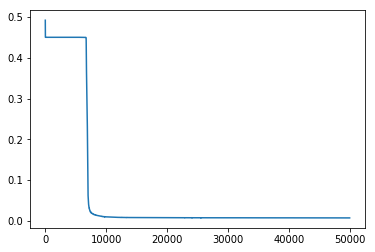

In [30]:
plt.plot(costs)

## Batch Gradient Descent

In [ ]:

def train(X, y, hidden_layers, alpha=0.9, epochs=20000, parameters=None, verbose=100):
    m = X.shape[1]
    
    layers = [X.shape[0]] + hidden_layers + [y.shape[0]]

    if parameters == None:
        parameters = initialize_weights(layers)
    
    costs = []
    for epoch in range(1, epochs + 1):

        ### Shuffling ###
        indices = np.arange(X.shape[1])
        np.random.shuffle(indices)

        X = X[:, indices]
        y = y[:, indices]

        #################

        y_true = y

        y_pred, cache = feedforward(X, parameters)
        
        cost = compute_cost(y_true, y_pred)
        
        gradients = backpropagation(y_true, y_pred, cache, parameters)

        for i in range(1, parameters['num_of_layers'] + 1):
            assert parameters[f'W{i}'].shape == gradients[f'dW{i}'].shape, 'Size Mismatch'
            assert parameters[f'b{i}'].shape == gradients[f'db{i}'].shape, 'Size Mismatch'

        # update weights
        parameters = update_parameters(parameters=parameters, gradients=gradients, alpha=alpha)

        costs.append(cost)

        if epoch % verbose == 0:
            print(epoch, cost)
    return parameters, costs

In [ ]:
tic = time.time()
parameters, costs = train(X_train, y_train, hidden_layers=[32, 16], alpha=0.99,
                          parameters=None, epochs=1000, verbose=1)
toc = time.time()

In [ ]:
(toc - tic) / 3600

In [ ]:
A0 = X_test.T
A0.shape

In [ ]:
y_true = y_test.T
y_true.shape

In [ ]:
y_pred, _ = feedforward(A0, parameters)

In [ ]:
print(y_pred.shape)
print(y_true.shape)

In [ ]:
len(costs)

In [ ]:
y_pred

In [ ]:
my_labels_pred = binarizer.inverse_transform(y_pred.T)
print(classification_report(test_data[output], my_labels_pred))

In [ ]:
plt.plot(costs)